# Project 2 
## Goal(s):

Predict if the customer will subscribe (yes/no) to a term deposit (variable y)

## Success Metric(s):

Hit %81 or above accuracy by evaluating with 5-fold cross validation and reporting the average performance score.

## Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

Note: with help from https://www.kaggle.com/code/niklasdonges/end-to-end-project-with-python

In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
import xgboost as xgb


#Cross validation
from sklearn.model_selection import KFold, cross_val_score

#Other
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

#class imbalance
from sklearn.metrics import f1_score
from sklearn.utils import resample


# Loading data

In [2]:
og_data = pd.read_csv('term-deposit-marketing-2020.csv')
data = og_data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        40000 non-null  int64 
 1   job        40000 non-null  object
 2   marital    40000 non-null  object
 3   education  40000 non-null  object
 4   default    40000 non-null  object
 5   balance    40000 non-null  int64 
 6   housing    40000 non-null  object
 7   loan       40000 non-null  object
 8   contact    40000 non-null  object
 9   day        40000 non-null  int64 
 10  month      40000 non-null  object
 11  duration   40000 non-null  int64 
 12  campaign   40000 non-null  int64 
 13  y          40000 non-null  object
dtypes: int64(5), object(9)
memory usage: 4.3+ MB


In [64]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'y'],
      dtype='object')

In [5]:
data.describe()

,age,balance,day,duration,campaign
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,40.544600,1274.277550,16.017225,254.824300,2.882175
std,9.641776,2903.769716,8.278127,259.366498,3.239051
min,19.000000,-8019.000000,1.000000,0.000000,1.000000
25%,33.000000,54.000000,8.000000,100.000000,1.000000
50%,39.000000,407.000000,17.000000,175.000000,2.000000
75%,48.000000,1319.000000,21.000000,313.000000,3.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000


In [6]:
data.head(15)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,no


In [7]:
no = data[data['y'] == 'no']
yes = data[data['y'] == 'yes']

print(len(no))
print(len(yes))
print((len(yes)/(len(no)+len(yes)))*100)

37104
2896
7.24


7% of the data set is Y = 'yes'. There are 40'000 entries and 13 features: 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign'

In [8]:
total = data.isnull().sum().sort_values(ascending=False)
percent_1 = data.isnull().sum()/data.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
age,0,0.0
job,0,0.0
marital,0,0.0
education,0,0.0
default,0,0.0


No null/missing data

age : age of customer (numeric)

job : type of job (categorical)

marital : marital status (categorical)

education (categorical)

default: has credit in default? (binary)

balance: average yearly balance, in euros (numeric)

housing: has a housing loan? (binary)

loan: has personal loan? (binary)

contact: contact communication type (categorical)

day: last contact day of the month (numeric)

month: last contact month of year (categorical)

duration: last contact duration, in seconds (numeric)

campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

In [9]:
feature_cols = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign']

In [10]:
print('age: ', data.age.unique())
print('job: ', data.job.unique())
print('marital: ', data.marital.unique())
print('education: ', data.education.unique())
print('default: ', data.default.unique())
print('balance: ', data.balance.unique())
print('housing: ', data.housing.unique())
print('loan: ', data.loan.unique())
print('contact: ', data.contact.unique())
print('day: ', data.day.unique())
print('month: ', data.month.unique())
print('duration: ', data.duration.unique())
print('campagn: ', data.campaign.unique())
print('y: ', data.y.unique())

age:  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:  ['married' 'single' 'divorced']
education:  ['tertiary' 'secondary' 'unknown' 'primary']
default:  ['no' 'yes']
balance:  [  2143     29      2 ...   7222   3402 102127]
housing:  ['yes' 'no']
loan:  ['no' 'yes']
contact:  ['unknown' 'cellular' 'telephone']
day:  [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration:  [ 261  151   76 ... 1880 1460 2219]
campagn:  [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 

Text(0.5, 1.0, 'Yes')

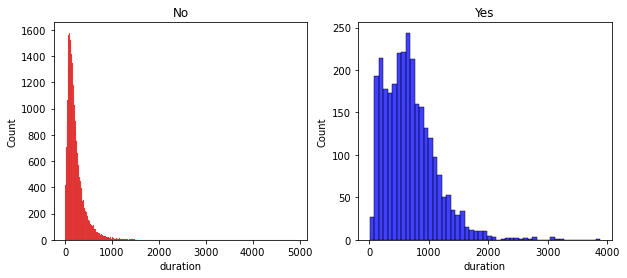

In [82]:
feature = 'duration'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

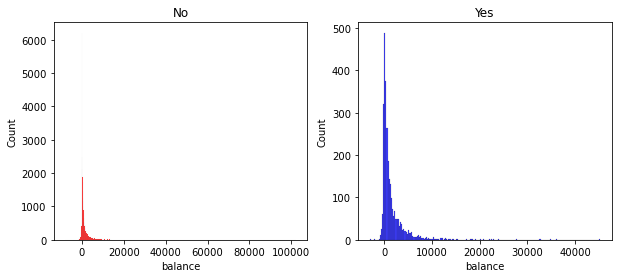

In [83]:
feature = 'balance'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

Text(0.5, 1.0, 'Yes')

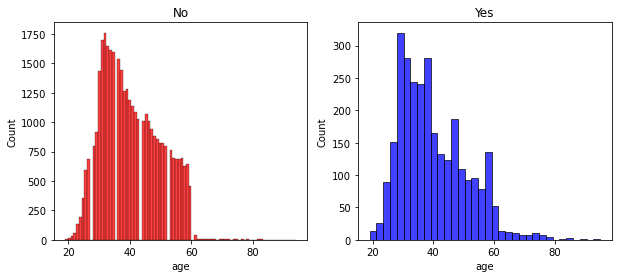

In [84]:
feature = 'age'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes') 

In [81]:
feature = 'job'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

In [ ]:
feature = 'marital'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

In [ ]:
feature = 'education'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

In [ ]:
feature = 'default'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

In [ ]:
feature = 'housing'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

In [ ]:
feature = 'loan'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

In [ ]:
feature = 'contact'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

In [ ]:
feature = 'day'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

In [ ]:
feature = 'month'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

In [ ]:
feature = 'campaign'

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.histplot(data = no, x=feature, ax = axes[0], color = 'r')
ax.set_title('No')
ax = sns.histplot(data = yes, x=feature, ax = axes[1], color = 'b')
ax.set_title('Yes')

# Marital and age

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3,figsize=(10, 4))
married = data[data['marital']=='married']
single = data[data['marital']=='single']
divorced = data[data['marital']=='divorced']
ax = sns.distplot(married[married['y']=='no'].age, bins=18, label = 'no', ax = axes[0], kde =False)
ax = sns.distplot(married[married['y']=='yes'].age, bins=18, label = 'yes', ax = axes[0], kde =False)
ax.legend()
ax.set_title('Married')
ax = sns.distplot(single[single['y']=='no'].age, bins=18, label = 'no', ax = axes[1], kde =False)
ax = sns.distplot(single[single['y']=='yes'].age, bins=18, label = 'yes', ax = axes[1], kde =False)
ax.legend()
ax.set_title('Single')
ax = sns.distplot(divorced[divorced['y']=='no'].age, bins=18, label = 'no', ax = axes[2], kde =False)
ax = sns.distplot(divorced[divorced['y']=='yes'].age, bins=18, label = 'yes', ax = axes[2], kde =False)
ax.legend()
ax.set_title('Divorced')

No missing data

In [ ]:
data.info()

# Making numerical

In [13]:
#reminder
print('age: ', data.age.unique())
print('job: ', data.job.unique())
print('marital: ', data.marital.unique())
print('education: ', data.education.unique())
print('default: ', data.default.unique())
print('balance: ', data.balance.unique())
print('housing: ', data.housing.unique())
print('loan: ', data.loan.unique())
print('contact: ', data.contact.unique())
print('day: ', data.day.unique())
print('month: ', data.month.unique())
print('duration: ', data.duration.unique())
print('campagn: ', data.campaign.unique())
print('y: ', data.y.unique())

age:  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job:  ['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital:  ['married' 'single' 'divorced']
education:  ['tertiary' 'secondary' 'unknown' 'primary']
default:  ['no' 'yes']
balance:  [  2143     29      2 ...   7222   3402 102127]
housing:  ['yes' 'no']
loan:  ['no' 'yes']
contact:  ['unknown' 'cellular' 'telephone']
day:  [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:  ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr']
duration:  [ 261  151   76 ... 1880 1460 2219]
campagn:  [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 

In [14]:
job = {'management':0, 'technician':1, 'entrepreneur':2, 'blue-collar':3, 'unknown':4,
 'retired':5, 'admin':6,  'services':7,  'self-employed':8,  'unemployed':9, 'housemaid':10,
 'student':11}
marital = {'married':0, 'single':1, 'divorced':2}
education = {'tertiary':0, 'secondary':1, 'unknown':2, 'primary':3}
default = {'no':0, 'yes':1}
housing = {'no':0, 'yes':1}
loan = {'no':0, 'yes':1}
contact = {'unknown':0, 'cellular':1, 'telephone':2}
month = {'jan':1, 'feb':2, 'mar': 3, 'apr':4, 'may': 5, 'jun': 6, 'jul':7, 'aug': 8, 'oct': 10, 'nov':11,'dec':12}
ymap = {'no':0, 'yes':1}

In [15]:
data['job'] = data['job'].map(job)
data['marital'] = data['marital'].map(marital)
data['education'] = data['education'].map(education)
data['default'] = data['default'].map(default)
data['housing'] = data['housing'].map(housing)
data['loan'] = data['loan'].map(loan)
data['contact'] = data['contact'].map(contact)
data['month'] = data['month'].map(month)
data['y'] = data['y'].map(ymap)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        40000 non-null  int64
 1   job        40000 non-null  int64
 2   marital    40000 non-null  int64
 3   education  40000 non-null  int64
 4   default    40000 non-null  int64
 5   balance    40000 non-null  int64
 6   housing    40000 non-null  int64
 7   loan       40000 non-null  int64
 8   contact    40000 non-null  int64
 9   day        40000 non-null  int64
 10  month      40000 non-null  int64
 11  duration   40000 non-null  int64
 12  campaign   40000 non-null  int64
 13  y          40000 non-null  int64
dtypes: int64(14)
memory usage: 4.3 MB


In [17]:
#checking now
print('age: ', data.age.unique())
print('job: ', data.job.unique())
print('marital: ', data.marital.unique())
print('education: ', data.education.unique())
print('default: ', data.default.unique())
print('balance: ', data.balance.unique())
print('housing: ', data.housing.unique())
print('loan: ', data.loan.unique())
print('contact: ', data.contact.unique())
print('day: ', data.day.unique())
print('month: ', data.month.unique())
print('duration: ', data.duration.unique())
print('campagn: ', data.campaign.unique())
print('y: ', data.y.unique())

age:  [58 44 33 47 35 28 42 43 41 29 53 57 51 45 60 56 32 25 40 39 52 46 36 49
 59 37 50 54 55 48 24 38 31 30 27 34 23 26 61 22 21 20 66 62 83 75 67 70
 65 68 64 69 72 71 19 76 85 63 90 82 73 74 78 80 94 79 77 86 95 81]
job:  [ 0  1  2  3  4  5  6  7  8  9 10 11]
marital:  [0 1 2]
education:  [0 1 2 3]
default:  [0 1]
balance:  [  2143     29      2 ...   7222   3402 102127]
housing:  [1 0]
loan:  [0 1]
contact:  [0 1 2]
day:  [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24 25  1 10 22 31]
month:  [ 5  6  7  8 10 11 12  1  2  3  4]
duration:  [ 261  151   76 ... 1880 1460 2219]
campagn:  [ 1  2  3  5  4  6  7  8  9 10 11 12 13 19 14 24 16 32 18 22 15 17 25 21
 43 51 63 41 26 28 55 50 38 23 20 29 31 37 30 46 27 58 33 35 34 36 39 44]
y:  [0 1]


# Make X and Y

In [18]:
X = data[feature_cols]
y = data.y 
print(X)

       age  job  marital  education  default  balance  housing  loan  contact  \
0       58    0        0          0        0     2143        1     0        0   
1       44    1        1          1        0       29        1     0        0   
2       33    2        0          1        0        2        1     1        0   
3       47    3        0          2        0     1506        1     0        0   
4       33    4        1          2        0        1        0     0        0   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
39995   53    1        0          0        0      395        0     0        1   
39996   30    0        1          0        0     3340        0     0        1   
39997   54    6        2          1        0      200        0     0        1   
39998   34    0        0          0        0     1047        0     0        1   
39999   38    1        0          1        0     1442        1     0        1   

       day  month  duration

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Feature importance

In [44]:
print(len(data[data.balance <0]))
print(min(data.balance))

3731
-8019


In [45]:
#because there are some negative values, 
#we will temporarily add the min value, 8019, to all balances to calculate chi2
for i in range(len(data.index)):
    data.balance.iloc[i] += 8019
    
print(len(data[data.balance <0]))
print(min(data.balance))

0
0


In [46]:
for feat in feature_cols:
    print(len(data[data[feat] <0]))

0
0
0
0
0
0
0
0
0
0
0
0
0


In [49]:
X_mod = data[feature_cols]
y_mod = data.y 

In [50]:
#filter features by importance

# Perform feature selection using the chi2 method
selector = SelectKBest(score_func=chi2, k='all')
selector.fit(X_mod, y_mod)

# Get the feature importances based on the chi2 scores
scores = selector.scores_

# Create a dataframe with the feature names and their importances
features = X_mod.columns
importances = pd.DataFrame({'Feature': features, 'Importance': scores})

# Sort the dataframe by importance
importances = importances.sort_values(by='Importance', ascending=False)

# Print the feature importances
print(importances)

      Feature    Importance
11   duration  2.245727e+06
5     balance  3.316896e+04
12   campaign  2.370594e+02
8     contact  9.106058e+01
2     marital  8.287598e+01
10      month  6.756137e+01
3   education  6.555857e+01
6     housing  4.714734e+01
0         age  3.769258e+01
7        loan  3.184029e+01
9         day  7.052987e+00
4     default  1.686247e+00
1         job  4.923854e-01


In [51]:
#reverse addition
for i in range(len(data.index)):
    data.balance.iloc[i] -= 8019
    
print(len(data[data.balance <0]))
print(min(data.balance))

3731
-8019


# Working on class imbalance

Above we saw that only 7% of the data set is Y = 'yes' (y=1)

In [20]:
# y=1 represents the positive/minority class


def resample_data(X, y, up, down):
    """Upsample the minority class by factor up, and downsample majority class by factor down, 
        to address class imbalance"""
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    

    # Downsample the majority class
    X_train_majority = X_train[y_train==0]
    y_train_majority = y_train[y_train==0]
    X_train_majority_downsampled, y_train_majority_downsampled = resample(X_train_majority, y_train_majority,
                                                                          replace=False,
                                                                          n_samples=int(X_train_majority.shape[0]/down),
                                                                          random_state=42)

    # Upsample the minority class
    X_train_minority = X_train[y_train==1]
    y_train_minority = y_train[y_train==1]
    X_train_minority_upsampled, y_train_minority_upsampled = resample(X_train_minority, y_train_minority,
                                                                      replace=True,
                                                                      n_samples=X_train_minority.shape[0]*up,
                                                                      random_state=42)
    print(f"Minority class length is {len(X_train_minority_upsampled)} and majority class length is {len(X_train_majority_downsampled)}")
    print(f"Minority class is {round((len(X_train_minority_upsampled)/len(X))*100)}%")
    # Combine the upsampled minority class and downsampled majority class
    X_train_resampled = np.concatenate([X_train_minority_upsampled, X_train_majority_downsampled])
    y_train_resampled = np.concatenate([y_train_minority_upsampled, y_train_majority_downsampled])
    
    return X_train_resampled, X_test, y_train_resampled, y_test
  

# upsample the minority class by factor 3 (up = 3) and downsample majority class by half (down = 2)
X_train_resampled1, X_test1, y_train_resampled1, y_test1 = resample_data(X, y, 3, 2)

# upsample the minority class by factor 4 (up = 4) and downsample majority class by half (down = 2)
X_train_resampled2, X_test2, y_train_resampled2, y_test2 = resample_data(X, y, 4, 2)



Minority class length is 7077 and majority class length is 14820
Minority class is 18%
Minority class length is 9288 and majority class length is 14839
Minority class is 23%


# Building ML models

In [21]:
#test different models on data
def compare_models(X_train, X_test, y_train, y_test):
    d = {}
    print('Difference in model accuracy')
    # Create a Logistic Regression classifier
    clf = LogisticRegression(random_state=16)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Logistic Regression"
    d[k] =  accuracy
    print(k, accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{k} F1 Score: {f1:.2f}\n")
    
    # Create a KNN classifier
    clf = KNeighborsClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "KNN"
    d[k] =  accuracy
    print(k, accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{k} F1 Score: {f1:.2f}\n")
    
    # Create a Decision Tree classifier
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Decision tree"
    d[k] =  accuracy
    print(k, accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{k} F1 Score: {f1:.2f}\n")
    
    # Create a Random Forest classifier
    clf = RandomForestClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Random forest"
    d[k] =  accuracy
    print(k, accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{k} F1 Score: {f1:.2f}\n")
    
    #Create a Gradient Boosting classifier
    clf = GradientBoostingClassifier()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Gradient Boosting"
    d[k] =  accuracy
    print(k, accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{k} F1 Score: {f1:.2f}\n")
    
    #Create an XGBoost classifier

    params = {'objective': 'binary:logistic', 'max_depth': 3, 'learning_rate': 0.1}
    clf = xgb.XGBClassifier(**params)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "XGBoost"
    d[k] =  accuracy
    print(k, accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{k} F1 Score: {f1:.2f}\n")
    
    max_k = max(d, key=lambda key: d[key])
    print("Max accuracy is", max_k, "with", d[max_k])


In [22]:
#comparing models
compare_models(X_train, X_test, y_train, y_test)

Difference in model accuracy
Logistic Regression 0.931
Logistic Regression F1 Score: 0.33



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


KNN 0.926
KNN F1 Score: 0.34

Decision tree 0.916375
Decision tree F1 Score: 0.46

Random forest 0.9335
Random forest F1 Score: 0.42

Gradient Boosting 0.934625
Gradient Boosting F1 Score: 0.43

XGBoost 0.934375
XGBoost F1 Score: 0.42

Max accuracy is Gradient Boosting with 0.934625


# Trying to improve Logistic regression

In [23]:
def log_reg_plot(X_train, X_test, y_train, y_test, plot=True):
    print('Logistic regression')
    # Create a Logistic Regression classifier
    clf = LogisticRegression(random_state=16)
    clf.fit(X_train, y_train)
    
    # Predict probabilities for the test set
    probabilities = clf.predict_proba(X_test)

    # Print the first 10 probabilities
    print('test', list(y_test)[:10])
    print('probs', probabilities[:10])

    print('using predict function')
    y_pred = clf.predict(X_test)
    print('prediction', y_pred[:10])
    accuracy = accuracy_score(y_test, y_pred)
#     d[k] =  accuracy
    print('accuracy', accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"F1 Score: {f1:.2f}\n")
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    if plot:
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()



Logistic regression
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[0.97790782 0.02209218]
 [0.94146319 0.05853681]
 [0.31188334 0.68811666]
 [0.94512626 0.05487374]
 [0.99685949 0.00314051]
 [0.97979253 0.02020747]
 [0.99033883 0.00966117]
 [0.95019302 0.04980698]
 [0.90265336 0.09734664]
 [0.85774637 0.14225363]]
using predict function
prediction [0 0 1 0 0 0 0 0 0 0]
accuracy 0.931
F1 Score: 0.33



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


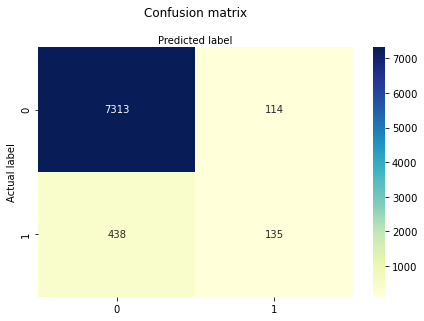

Logistic regression
test [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
probs [[0.80465035 0.19534965]
 [0.88537203 0.11462797]
 [0.62606359 0.37393641]
 [0.35550325 0.64449675]
 [0.8726976  0.1273024 ]
 [0.83440969 0.16559031]
 [0.59570455 0.40429545]
 [0.9175039  0.0824961 ]
 [0.93378563 0.06621437]
 [0.82609524 0.17390476]]
using predict function
prediction [0 0 0 1 0 0 0 0 0 0]
accuracy 0.89775
F1 Score: 0.45



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


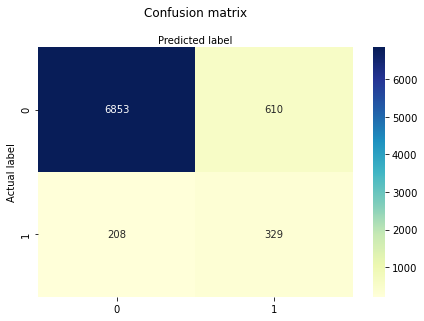

Logistic regression
test [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
probs [[8.47124839e-01 1.52875161e-01]
 [7.31446423e-01 2.68553577e-01]
 [8.83806158e-01 1.16193842e-01]
 [8.50429746e-01 1.49570254e-01]
 [8.33777443e-01 1.66222557e-01]
 [3.73287614e-07 9.99999627e-01]
 [9.49335239e-01 5.06647606e-02]
 [3.31484855e-01 6.68515145e-01]
 [8.55118612e-02 9.14488139e-01]
 [4.99583006e-01 5.00416994e-01]]
using predict function
prediction [0 0 0 0 0 1 0 1 1 1]
accuracy 0.875125
F1 Score: 0.45



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


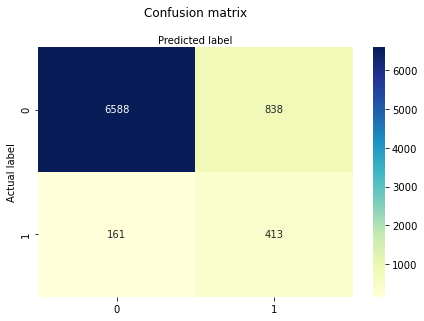

In [24]:
#comparing upsampling/downsampling on logistic regression
log_reg_plot(X_train, X_test, y_train, y_test, plot=True)
log_reg_plot(X_train_resampled1, X_test1, y_train_resampled1, y_test1, plot=True)
log_reg_plot(X_train_resampled2, X_test2, y_train_resampled2, y_test2, plot=True)

resampled1 with 3x upsampling and downsampling by half worked best for F1 (0.45) and second best accuracy (89.7%)

In [25]:
#test different models on data
def changing_threshold_LR(X_train, X_test, y_train, y_test, threshold):
    print('Logistic regression')
    # Create a Logistic Regression classifier
    clf = LogisticRegression(random_state=16)
    clf.fit(X_train, y_train)
    
    # Predict probabilities for the test set
    probabilities = clf.predict_proba(X_test)

    # Print the first 10 probabilities
    print('test', list(y_test)[:10])
    print('probs', probabilities[:10])


    print(f'using {threshold} threshold')
    y_pred = (probabilities[:, 1] >= threshold).astype(int)
    print('new pred', y_pred[:10])
    accuracy = accuracy_score(y_test, y_pred)
    k = "Logistic regression"
#     d[k] =  accuracy
    print(k, accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{k} F1 Score: {f1:.2f}\n")
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    plot = True
    if plot:
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()


Logistic regression
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[0.97790782 0.02209218]
 [0.94146319 0.05853681]
 [0.31188334 0.68811666]
 [0.94512626 0.05487374]
 [0.99685949 0.00314051]
 [0.97979253 0.02020747]
 [0.99033883 0.00966117]
 [0.95019302 0.04980698]
 [0.90265336 0.09734664]
 [0.85774637 0.14225363]]
using 0.1 threshold
new pred [0 0 1 0 0 0 0 0 0 1]
Logistic regression 0.844375
Logistic regression F1 Score: 0.40



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


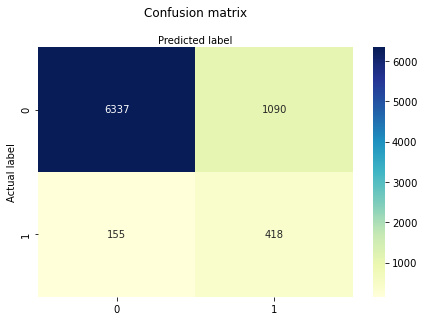

Logistic regression
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[0.97790782 0.02209218]
 [0.94146319 0.05853681]
 [0.31188334 0.68811666]
 [0.94512626 0.05487374]
 [0.99685949 0.00314051]
 [0.97979253 0.02020747]
 [0.99033883 0.00966117]
 [0.95019302 0.04980698]
 [0.90265336 0.09734664]
 [0.85774637 0.14225363]]
using 0.2 threshold
new pred [0 0 1 0 0 0 0 0 0 0]
Logistic regression 0.911125
Logistic regression F1 Score: 0.45



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


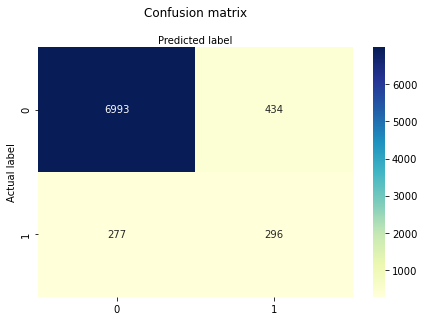

Logistic regression
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[0.97790782 0.02209218]
 [0.94146319 0.05853681]
 [0.31188334 0.68811666]
 [0.94512626 0.05487374]
 [0.99685949 0.00314051]
 [0.97979253 0.02020747]
 [0.99033883 0.00966117]
 [0.95019302 0.04980698]
 [0.90265336 0.09734664]
 [0.85774637 0.14225363]]
using 0.3 threshold
new pred [0 0 1 0 0 0 0 0 0 0]
Logistic regression 0.923875
Logistic regression F1 Score: 0.41



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


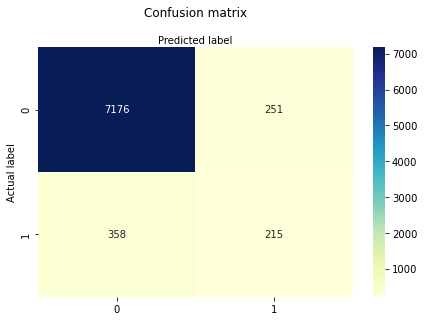

Logistic regression
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[0.97790782 0.02209218]
 [0.94146319 0.05853681]
 [0.31188334 0.68811666]
 [0.94512626 0.05487374]
 [0.99685949 0.00314051]
 [0.97979253 0.02020747]
 [0.99033883 0.00966117]
 [0.95019302 0.04980698]
 [0.90265336 0.09734664]
 [0.85774637 0.14225363]]
using 0.4 threshold
new pred [0 0 1 0 0 0 0 0 0 0]
Logistic regression 0.928375
Logistic regression F1 Score: 0.38



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


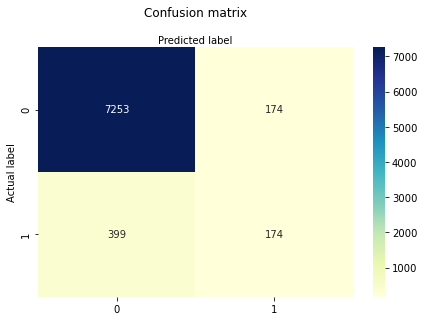

Logistic regression
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[0.97790782 0.02209218]
 [0.94146319 0.05853681]
 [0.31188334 0.68811666]
 [0.94512626 0.05487374]
 [0.99685949 0.00314051]
 [0.97979253 0.02020747]
 [0.99033883 0.00966117]
 [0.95019302 0.04980698]
 [0.90265336 0.09734664]
 [0.85774637 0.14225363]]
using 0.5 threshold
new pred [0 0 1 0 0 0 0 0 0 0]
Logistic regression 0.931
Logistic regression F1 Score: 0.33



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


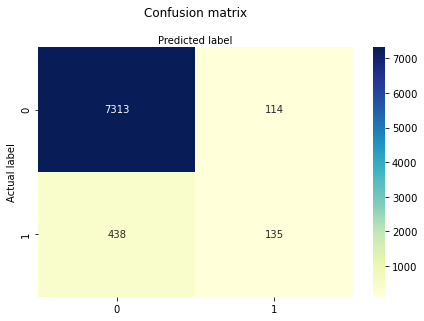

In [26]:
#changing threshold in probability score in log reg
changing_threshold_LR(X_train, X_test, y_train, y_test, 0.1)
changing_threshold_LR(X_train, X_test, y_train, y_test, 0.2)
changing_threshold_LR(X_train, X_test, y_train, y_test, 0.3)
changing_threshold_LR(X_train, X_test, y_train, y_test, 0.4)
changing_threshold_LR(X_train, X_test, y_train, y_test, 0.5)

Using threshold 0.2 gave best F1 (0.45) and second best accuracy results (91.1%)

In [27]:
#test different models on data
def changing_weights_LR(X_train, X_test, y_train, y_test, weights):
    print('Logistic regression')
    # Create a Logistic Regression classifier
    clf = LogisticRegression(class_weight=weights, random_state=16)
    clf.fit(X_train, y_train)
    
#     # Predict probabilities for the test set
#     probabilities = clf.predict_proba(X_test)

#     # Print the first 10 probabilities
#     print('test', list(y_test)[:10])
#     print('probs', probabilities[:10])

    
    print(f'using {weights} weight ratio')
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "Logistic regression"
#     d[k] =  accuracy
    print(k, accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{k} F1 Score: {f1:.2f}\n")
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    plot = True
    if plot:
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()


Logistic regression
using {0: 0.1, 1: 0.9} weight ratio
Logistic regression 0.85775
Logistic regression F1 Score: 0.42



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


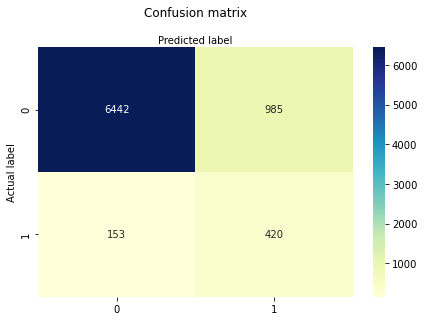

Logistic regression
using {0: 0.2, 1: 0.8} weight ratio
Logistic regression 0.91
Logistic regression F1 Score: 0.47



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


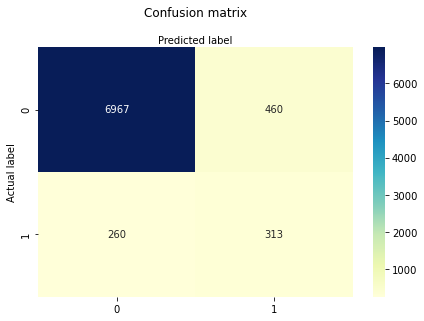

Logistic regression
using {0: 0.3, 1: 0.7} weight ratio
Logistic regression 0.92425
Logistic regression F1 Score: 0.42



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


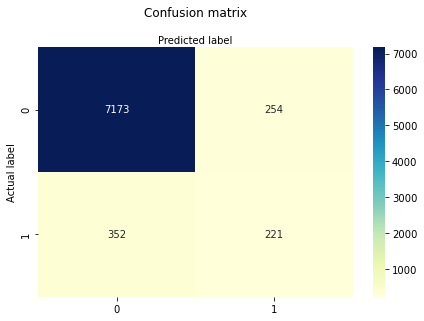

Logistic regression
using {0: 0.4, 1: 0.6} weight ratio
Logistic regression 0.929125
Logistic regression F1 Score: 0.35



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


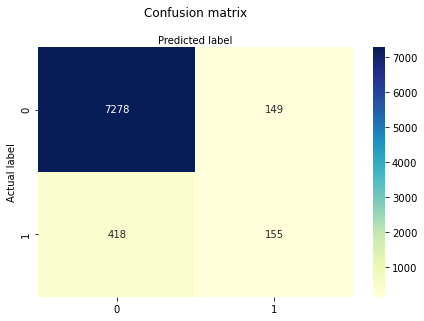

Logistic regression
using {0: 0.5, 1: 0.5} weight ratio
Logistic regression 0.92875
Logistic regression F1 Score: 0.32



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


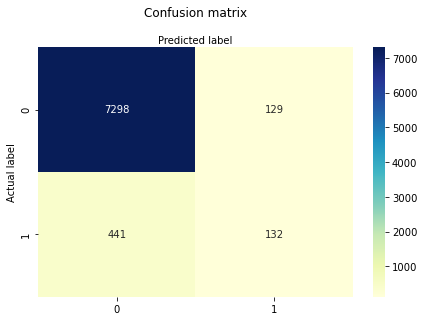

In [28]:
#changing class weights to assign higher weight to the minority class in log reg
changing_weights_LR(X_train, X_test, y_train, y_test, {0: 0.1, 1: 0.9})
changing_weights_LR(X_train, X_test, y_train, y_test, {0: 0.2, 1: 0.8})
changing_weights_LR(X_train, X_test, y_train, y_test, {0: 0.3, 1: 0.7})
changing_weights_LR(X_train, X_test, y_train, y_test, {0: 0.4, 1: 0.6})
changing_weights_LR(X_train, X_test, y_train, y_test, {0: 0.5, 1: 0.5})

Using class weights {0: 0.2, 1: 0.8} led to best F1 (0.47) and accuracy results (91%)

Results: Class weights was the best technique here

# Trying to improve XGBoost

In [29]:
def xg_boost_plot(X_train, X_test, y_train, y_test, plot=True):
    print('XGBoost')
    # Create a XGBoost classifier
    clf = xgb.XGBClassifier()
    clf.fit(X_train, y_train)
    
    # Predict probabilities for the test set
    probabilities = clf.predict_proba(X_test)

    # Print the first 10 probabilities
    print('test', list(y_test)[:10])
    print('probs', probabilities[:10])

    print('using predict function')
    y_pred = clf.predict(X_test)
    print('prediction', y_pred[:10])
    accuracy = accuracy_score(y_test, y_pred)
#     d[k] =  accuracy
    print('accuracy', accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"F1 Score: {f1:.2f}\n")
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    if plot:
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()



XGBoost
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[9.9984974e-01 1.5026936e-04]
 [9.7870499e-01 2.1294987e-02]
 [5.2359354e-01 4.7640648e-01]
 [9.9558252e-01 4.4174911e-03]
 [9.9940550e-01 5.9450656e-04]
 [9.9912143e-01 8.7855087e-04]
 [9.9975377e-01 2.4622676e-04]
 [9.9030203e-01 9.6979924e-03]
 [3.9240038e-01 6.0759962e-01]
 [4.8267102e-01 5.1732898e-01]]
using predict function
prediction [0 0 0 0 0 0 0 0 1 1]
accuracy 0.93225
F1 Score: 0.47



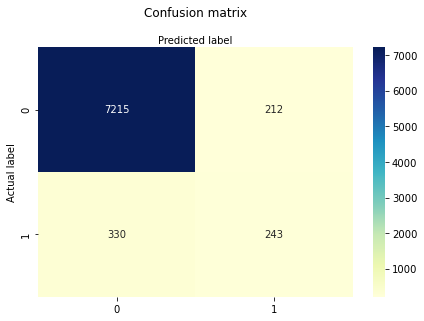

XGBoost
test [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
probs [[5.1427966e-01 4.8572034e-01]
 [9.9987900e-01 1.2099251e-04]
 [9.9481457e-01 5.1854015e-03]
 [8.0947804e-01 1.9052199e-01]
 [9.9777162e-01 2.2283769e-03]
 [9.9721110e-01 2.7889023e-03]
 [8.8512033e-01 1.1487967e-01]
 [9.9942613e-01 5.7386869e-04]
 [9.9730051e-01 2.6995093e-03]
 [8.2568747e-01 1.7431255e-01]]
using predict function
prediction [0 0 0 0 0 0 0 0 0 0]
accuracy 0.919875
F1 Score: 0.55



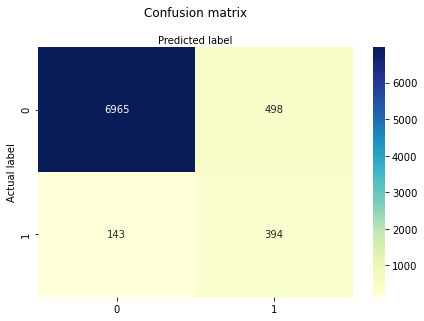

XGBoost
test [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
probs [[9.99360204e-01 6.39812497e-04]
 [9.89099622e-01 1.09003531e-02]
 [9.99616504e-01 3.83510196e-04]
 [9.93485153e-01 6.51483797e-03]
 [9.93624806e-01 6.37520477e-03]
 [1.09529674e-01 8.90470326e-01]
 [9.99972403e-01 2.76003902e-05]
 [9.15583789e-01 8.44162256e-02]
 [2.76450574e-01 7.23549426e-01]
 [9.77041781e-01 2.29582470e-02]]
using predict function
prediction [0 0 0 0 0 1 0 0 1 0]
accuracy 0.906
F1 Score: 0.54



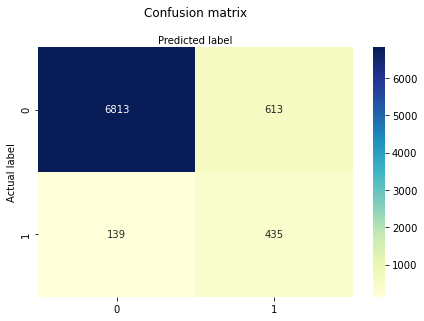

In [30]:
#comparing upsampling/downsampling on logistic regression
xg_boost_plot(X_train, X_test, y_train, y_test, plot=True)
xg_boost_plot(X_train_resampled1, X_test1, y_train_resampled1, y_test1, plot=True)
xg_boost_plot(X_train_resampled2, X_test2, y_train_resampled2, y_test2, plot=True)

resampled1 with 3x upsampling and downsampling by half worked best for F1 (0.55) and accuracy (91.9%)

In [33]:
#test different models on data
def changing_threshold_XG(X_train, X_test, y_train, y_test, threshold):
    print('XG Boost')
    # Create a XGBoost classifier
    clf = xgb.XGBClassifier()
    clf.fit(X_train, y_train)
    
    # Predict probabilities for the test set
    probabilities = clf.predict_proba(X_test)

    # Print the first 10 probabilities
    print('test', list(y_test)[:10])
    print('probs', probabilities[:10])


    print(f'using {threshold} threshold')
    y_pred = (probabilities[:, 1] >= threshold).astype(int)
    print('new pred', y_pred[:10])
    accuracy = accuracy_score(y_test, y_pred)
    k = "XGBoost"
#     d[k] =  accuracy
    print(k, accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{k} F1 Score: {f1:.2f}\n")
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    plot = True
    if plot:
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()


XG Boost
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[9.9984974e-01 1.5026936e-04]
 [9.7870499e-01 2.1294987e-02]
 [5.2359354e-01 4.7640648e-01]
 [9.9558252e-01 4.4174911e-03]
 [9.9940550e-01 5.9450656e-04]
 [9.9912143e-01 8.7855087e-04]
 [9.9975377e-01 2.4622676e-04]
 [9.9030203e-01 9.6979924e-03]
 [3.9240038e-01 6.0759962e-01]
 [4.8267102e-01 5.1732898e-01]]
using 0.1 threshold
new pred [0 0 1 0 0 0 0 0 1 1]
XGBoost 0.891875
XGBoost F1 Score: 0.53



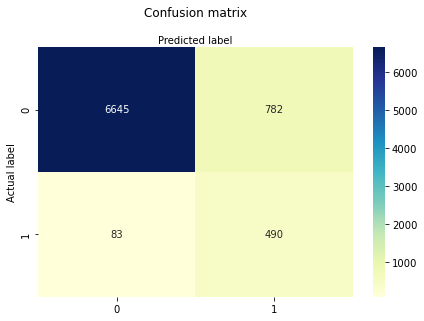

XG Boost
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[9.9984974e-01 1.5026936e-04]
 [9.7870499e-01 2.1294987e-02]
 [5.2359354e-01 4.7640648e-01]
 [9.9558252e-01 4.4174911e-03]
 [9.9940550e-01 5.9450656e-04]
 [9.9912143e-01 8.7855087e-04]
 [9.9975377e-01 2.4622676e-04]
 [9.9030203e-01 9.6979924e-03]
 [3.9240038e-01 6.0759962e-01]
 [4.8267102e-01 5.1732898e-01]]
using 0.2 threshold
new pred [0 0 1 0 0 0 0 0 1 1]
XGBoost 0.913875
XGBoost F1 Score: 0.55



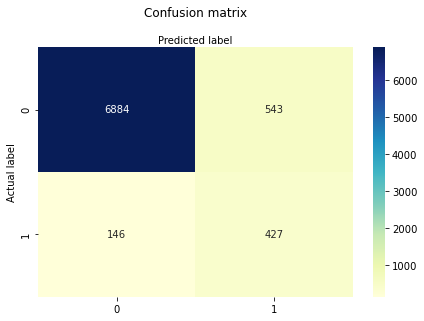

XG Boost
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[9.9984974e-01 1.5026936e-04]
 [9.7870499e-01 2.1294987e-02]
 [5.2359354e-01 4.7640648e-01]
 [9.9558252e-01 4.4174911e-03]
 [9.9940550e-01 5.9450656e-04]
 [9.9912143e-01 8.7855087e-04]
 [9.9975377e-01 2.4622676e-04]
 [9.9030203e-01 9.6979924e-03]
 [3.9240038e-01 6.0759962e-01]
 [4.8267102e-01 5.1732898e-01]]
using 0.3 threshold
new pred [0 0 1 0 0 0 0 0 1 1]
XGBoost 0.92425
XGBoost F1 Score: 0.55



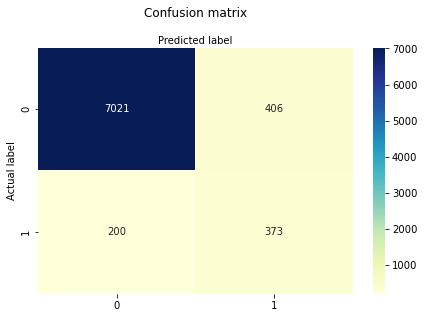

XG Boost
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[9.9984974e-01 1.5026936e-04]
 [9.7870499e-01 2.1294987e-02]
 [5.2359354e-01 4.7640648e-01]
 [9.9558252e-01 4.4174911e-03]
 [9.9940550e-01 5.9450656e-04]
 [9.9912143e-01 8.7855087e-04]
 [9.9975377e-01 2.4622676e-04]
 [9.9030203e-01 9.6979924e-03]
 [3.9240038e-01 6.0759962e-01]
 [4.8267102e-01 5.1732898e-01]]
using 0.4 threshold
new pred [0 0 1 0 0 0 0 0 1 1]
XGBoost 0.930125
XGBoost F1 Score: 0.52



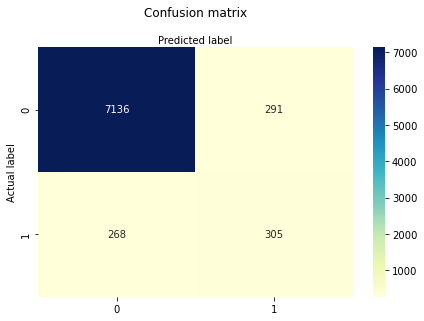

XG Boost
test [0, 0, 1, 0, 0, 0, 0, 0, 1, 1]
probs [[9.9984974e-01 1.5026936e-04]
 [9.7870499e-01 2.1294987e-02]
 [5.2359354e-01 4.7640648e-01]
 [9.9558252e-01 4.4174911e-03]
 [9.9940550e-01 5.9450656e-04]
 [9.9912143e-01 8.7855087e-04]
 [9.9975377e-01 2.4622676e-04]
 [9.9030203e-01 9.6979924e-03]
 [3.9240038e-01 6.0759962e-01]
 [4.8267102e-01 5.1732898e-01]]
using 0.5 threshold
new pred [0 0 0 0 0 0 0 0 1 1]
XGBoost 0.93225
XGBoost F1 Score: 0.47



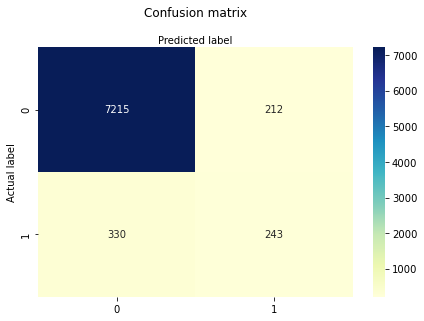

In [34]:
#changing threshold in probability score in log reg
changing_threshold_XG(X_train, X_test, y_train, y_test, 0.1)
changing_threshold_XG(X_train, X_test, y_train, y_test, 0.2)
changing_threshold_XG(X_train, X_test, y_train, y_test, 0.3)
changing_threshold_XG(X_train, X_test, y_train, y_test, 0.4)
changing_threshold_XG(X_train, X_test, y_train, y_test, 0.5)

Using threshold 0.3 gave best F1 (0.55) and accuracy results (92.4%)

In [38]:
#test different models on data
def changing_weights_XG(X_train, X_test, y_train, y_test, weight):
    print('XG Boost')
    # Create a XGBoost classifier
    clf = xgb.XGBClassifier(scale_pos_weight=weight)
    clf.fit(X_train, y_train)
    
#     # Predict probabilities for the test set
#     probabilities = clf.predict_proba(X_test)

#     # Print the first 10 probabilities
#     print('test', list(y_test)[:10])
#     print('probs', probabilities[:10])

    
    print(f'using {weight} as weight')
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    k = "XG Boost"
#     d[k] =  accuracy
    print(k, accuracy)
    f1 = f1_score(y_test, y_pred, pos_label=1)
    print(f"{k} F1 Score: {f1:.2f}\n")
    
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    plot = True
    if plot:
        class_names=[0,1] # name  of classes
        fig, ax = plt.subplots()
        tick_marks = np.arange(len(class_names))
        plt.xticks(tick_marks, class_names)
        plt.yticks(tick_marks, class_names)
        # create heatmap
        sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
        ax.xaxis.set_label_position("top")
        plt.tight_layout()
        plt.title('Confusion matrix', y=1.1)
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label')
        plt.show()


XG Boost
using 9.5 as weight
XG Boost 0.90475
XG Boost F1 Score: 0.53



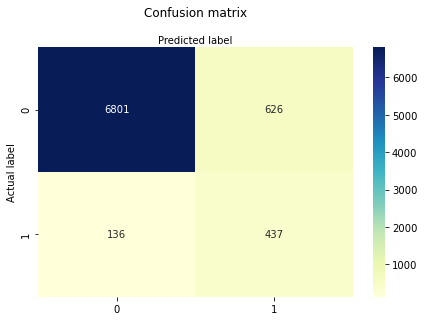

XG Boost
using 9 as weight
XG Boost 0.907875
XG Boost F1 Score: 0.54



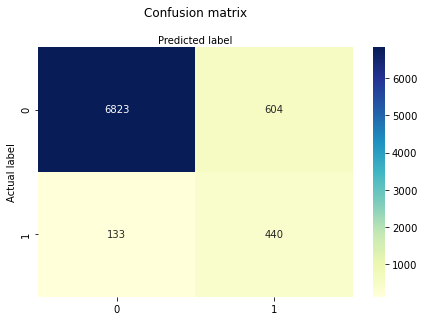

XG Boost
using 8.5 as weight
XG Boost 0.91075
XG Boost F1 Score: 0.55



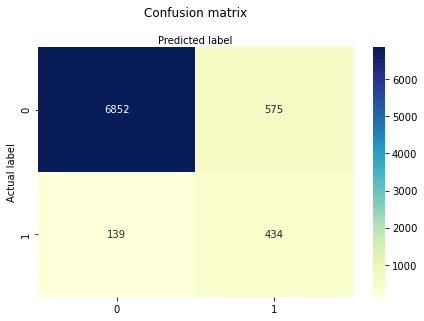

XG Boost
using 8 as weight
XG Boost 0.9145
XG Boost F1 Score: 0.56



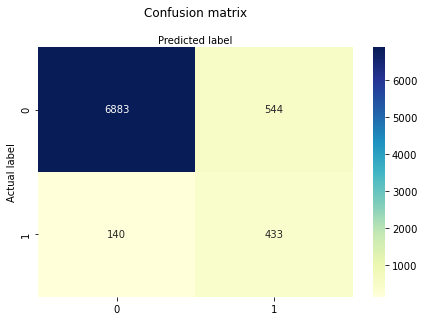

XG Boost
using 7.5 as weight
XG Boost 0.910375
XG Boost F1 Score: 0.54



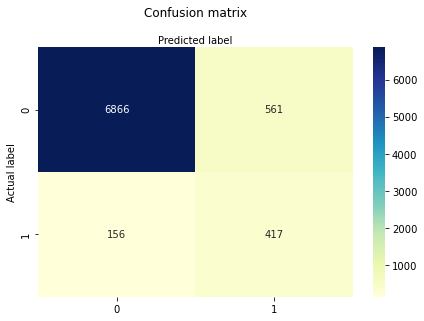

In [41]:
#changing class weights to assign higher weight to the minority class in log reg
changing_weights_XG(X_train, X_test, y_train, y_test, 9.5)
changing_weights_XG(X_train, X_test, y_train, y_test, 9)
changing_weights_XG(X_train, X_test, y_train, y_test, 8.5)
changing_weights_XG(X_train, X_test, y_train, y_test, 8)
changing_weights_XG(X_train, X_test, y_train, y_test, 7.5)

Using weight 8 led to best F1 (0.56) and accuracy results (91.4%)

Changing weights was the best technique here

In [43]:
#second pass at models
print("Resampled data with 0.2 test size, testing different models")
compare_models(X_train_resampled1, X_test1, y_train_resampled1, y_test1)

Resampled data with 0.2 test size, testing different models
Difference in model accuracy
Logistic Regression 0.89775
Logistic Regression F1 Score: 0.45



/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


KNN 0.848375
KNN F1 Score: 0.35

Decision tree 0.909375
Decision tree F1 Score: 0.42



/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


Random forest 0.929625
Random forest F1 Score: 0.55



/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:402: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


Gradient Boosting 0.900625
Gradient Boosting F1 Score: 0.52

XGBoost 0.900625
XGBoost F1 Score: 0.53

Max accuracy is Random forest with 0.929625


## Result for model accuracy and F1

XGBoost with changed class weights led to best F1 score (0.56) with good accuracy (91.4%)

# Cross validation

In [52]:
# Create a random forest classifier
clf = xgb.XGBClassifier(scale_pos_weight=8)

# Define the number of folds
n_folds = 5

# Create a KFold object with the specified number of folds
kf = KFold(n_splits=n_folds)

# Perform k-fold cross-validation
scores = cross_val_score(clf, X, y, cv=kf)

# Print the average score across all folds
print("Average score: ", np.mean(scores))

Average score:  0.8733000000000001


# Results
5fold cross validation on the best algorithm from the above (XGBoost with class weight=8) gives an average score of 87.3%

## To do

Bonus(es):

We are also interested in finding customers who are more likely to buy the investment product. Determine the segment(s) of customers our client should prioritize.

What makes the customers buy? Tell us which feature we should be focusing more on.

using 8 as weight
XG Boost 0.9145
XG Boost F1 Score: 0.56



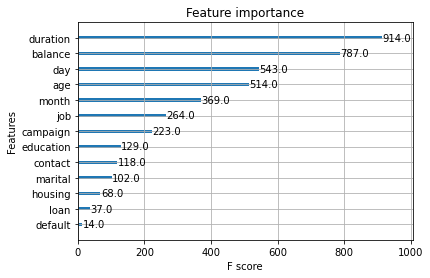

In [108]:
weight = 8
clf = xgb.XGBClassifier(scale_pos_weight=weight)
clf.fit(X_train, y_train)

print(f'using {weight} as weight')
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
k = "XG Boost"
print(k, accuracy)
f1 = f1_score(y_test, y_pred, pos_label=1)
print(f"{k} F1 Score: {f1:.2f}\n")
xgb.plot_importance(clf)
plt.show()


Based on this we can answer Bonus Q2: The duration of the call influences whether customers buy or not > focus on this feature

In [120]:
# Add the predicted probabilities as a new column in the original dataset
data['probabilities'] = clf.predict_proba(data.drop('y', axis=1))[:, 1]

# Sort the dataset by predicted probabilities in descending order
data = data.sort_values('probabilities', ascending=False)

# Group the customers by characteristics and calculate the average predicted probability for each group
grouped_data = data.groupby(['balance', 'age']).agg({'probabilities': 'mean'})

# Identify the segments of customers that are more likely to buy the investment product and prioritize them
high_priority_segments = grouped_data[grouped_data['probabilities'] > 0.7]

# Print the high-priority segments
print(high_priority_segments)



             probabilities
balance age               
-3058   39        0.940581
-1944   51        0.939848
-1129   42        0.935190
-970    52        0.920805
-930    26        0.983928
...                    ...
 27624  55        0.946876
 32685  61        0.996218
 34646  32        0.922907
 36252  29        0.952284
 45248  39        0.914252

[2207 rows x 1 columns]


In [112]:
# bin age and income columns
age_bins = [18, 28, 38, 48, 58, 68, 78, 88, 100]
age_labels = ['18-28', '28-38', '38-48', '48-58', '58-68', '68-78', '78-88', '88+']
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels)

balance_bins = [-9000, 0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000,90000,100000,110000]
balance_labels = ['neg', '0-10k', '10-20k','20-30k','30-40k','40-50k', '50-60k', '60-70k', '70-80k','80-90k','90-100k', '100k+']
data['balance_group'] = pd.cut(data['balance'], bins=balance_bins, labels=balance_labels)

# group by age and income groups
new_grouped_data = data.groupby(['age_group', 'balance_group']).agg({'probabilities': 'mean'})


In [113]:
# Identify the segments of customers that are more likely to buy the investment product and prioritize them
new_high_priority_segments = new_grouped_data[new_grouped_data['probabilities'] > 0.7]

# Print the high-priority segments
print(new_high_priority_segments)

                         probabilities
age_group balance_group               
78-88     10-20k              0.996982
88+       0-10k               0.762964


Based on this we can answer Bonus Q1: the above segments have a high probability (>0.7) of buying the product so the client should focus on them. Another suggestion is to look at the class of clients in the model results that were predicted to buy the product but havent (false positives). These might also be good candidates for buying product.